In [1]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import random
random.seed(4)

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [2]:
car_data = pd.read_csv('CarPrice_Assignment.csv')
car_data.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


#### No Duplicate Records found

In [3]:
sum(car_data.duplicated()) == 0

True

In [4]:
car_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
car_ID              205 non-null int64
symboling           205 non-null int64
CarName             205 non-null object
fueltype            205 non-null object
aspiration          205 non-null object
doornumber          205 non-null object
carbody             205 non-null object
drivewheel          205 non-null object
enginelocation      205 non-null object
wheelbase           205 non-null float64
carlength           205 non-null float64
carwidth            205 non-null float64
carheight           205 non-null float64
curbweight          205 non-null int64
enginetype          205 non-null object
cylindernumber      205 non-null object
enginesize          205 non-null int64
fuelsystem          205 non-null object
boreratio           205 non-null float64
stroke              205 non-null float64
compressionratio    205 non-null float64
horsepower          205 non-null int64
peakrpm      

## Derived metrics and droppinng unwanted columns 

In [5]:
car_data['car_volume'] = car_data['carlength'] * car_data['carwidth'] * car_data['carheight']
#car_data['bore/stroke_ratio'] = car_data['boreratio'] / car_data['stroke']
car_data['avgmpg'] = car_data[['citympg', 'highwaympg']].mean(axis=1)

In [6]:
dropcol = ['car_ID','symboling','carlength','carwidth','carheight','citympg','highwaympg']#,'boreratio','stroke']
car_data.drop(dropcol, axis=1, inplace = True)

In [7]:
car_data.head()

,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,curbweight,enginetype,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,price,car_volume,avgmpg
0,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,2548,dohc,...,130,mpfi,3.47,2.68,9.0,111,5000,13495.0,528019.904,24.0
1,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,2548,dohc,...,130,mpfi,3.47,2.68,9.0,111,5000,16500.0,528019.904,24.0
2,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,2823,ohcv,...,152,mpfi,2.68,3.47,9.0,154,5000,16500.0,587592.640,22.5
3,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,2337,ohc,...,109,mpfi,3.19,3.40,10.0,102,5500,13950.0,634816.956,27.0
4,audi 100ls,gas,std,four,sedan,4wd,front,99.4,2824,ohc,...,136,mpfi,3.19,3.40,8.0,115,5500,17450.0,636734.832,20.0


In [8]:
car_data['CarName'] = car_data['CarName'].str.split(expand = True)[0]
car_data.head()

,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,curbweight,enginetype,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,price,car_volume,avgmpg
0,alfa-romero,gas,std,two,convertible,rwd,front,88.6,2548,dohc,...,130,mpfi,3.47,2.68,9.0,111,5000,13495.0,528019.904,24.0
1,alfa-romero,gas,std,two,convertible,rwd,front,88.6,2548,dohc,...,130,mpfi,3.47,2.68,9.0,111,5000,16500.0,528019.904,24.0
2,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,2823,ohcv,...,152,mpfi,2.68,3.47,9.0,154,5000,16500.0,587592.640,22.5
3,audi,gas,std,four,sedan,fwd,front,99.8,2337,ohc,...,109,mpfi,3.19,3.40,10.0,102,5500,13950.0,634816.956,27.0
4,audi,gas,std,four,sedan,4wd,front,99.4,2824,ohc,...,136,mpfi,3.19,3.40,8.0,115,5500,17450.0,636734.832,20.0


In [9]:
def unique(col):
    x = car_data[col].unique()
    return print(col,':',x)
for col in ['fueltype','aspiration','doornumber','carbody','drivewheel','enginelocation','enginetype','cylindernumber','fuelsystem','CarName']:
    unique(col)

fueltype : ['gas' 'diesel']
aspiration : ['std' 'turbo']
doornumber : ['two' 'four']
carbody : ['convertible' 'hatchback' 'sedan' 'wagon' 'hardtop']
drivewheel : ['rwd' 'fwd' '4wd']
enginelocation : ['front' 'rear']
enginetype : ['dohc' 'ohcv' 'ohc' 'l' 'rotor' 'ohcf' 'dohcv']
cylindernumber : ['four' 'six' 'five' 'three' 'twelve' 'two' 'eight']
fuelsystem : ['mpfi' '2bbl' 'mfi' '1bbl' 'spfi' '4bbl' 'idi' 'spdi']
CarName : ['alfa-romero' 'audi' 'bmw' 'chevrolet' 'dodge' 'honda' 'isuzu' 'jaguar'
 'maxda' 'mazda' 'buick' 'mercury' 'mitsubishi' 'Nissan' 'nissan'
 'peugeot' 'plymouth' 'porsche' 'porcshce' 'renault' 'saab' 'subaru'
 'toyota' 'toyouta' 'vokswagen' 'volkswagen' 'vw' 'volvo']


In [10]:
car_data['doornumber'] = car_data['doornumber'].replace(to_replace = ['four','two'],value=[4,2])
car_data['cylindernumber'] = car_data['cylindernumber'].replace(to_replace = ['two','three','four','five','six','eight','twelve'],value=[2,3,4,5,6,8,12])
car_data['CarName'] = car_data['CarName'].replace(to_replace=['vokswagen','vw','toyouta','maxda'],value=['volkswagen','volkswagen','toyota','mazda'])

In [11]:
for col in ['fueltype','aspiration','doornumber','carbody','drivewheel','enginelocation','enginetype','cylindernumber','fuelsystem','CarName']:
    unique(col) 

fueltype : ['gas' 'diesel']
aspiration : ['std' 'turbo']
doornumber : [2 4]
carbody : ['convertible' 'hatchback' 'sedan' 'wagon' 'hardtop']
drivewheel : ['rwd' 'fwd' '4wd']
enginelocation : ['front' 'rear']
enginetype : ['dohc' 'ohcv' 'ohc' 'l' 'rotor' 'ohcf' 'dohcv']
cylindernumber : [ 4  6  5  3 12  2  8]
fuelsystem : ['mpfi' '2bbl' 'mfi' '1bbl' 'spfi' '4bbl' 'idi' 'spdi']
CarName : ['alfa-romero' 'audi' 'bmw' 'chevrolet' 'dodge' 'honda' 'isuzu' 'jaguar'
 'mazda' 'buick' 'mercury' 'mitsubishi' 'Nissan' 'nissan' 'peugeot'
 'plymouth' 'porsche' 'porcshce' 'renault' 'saab' 'subaru' 'toyota'
 'volkswagen' 'volvo']


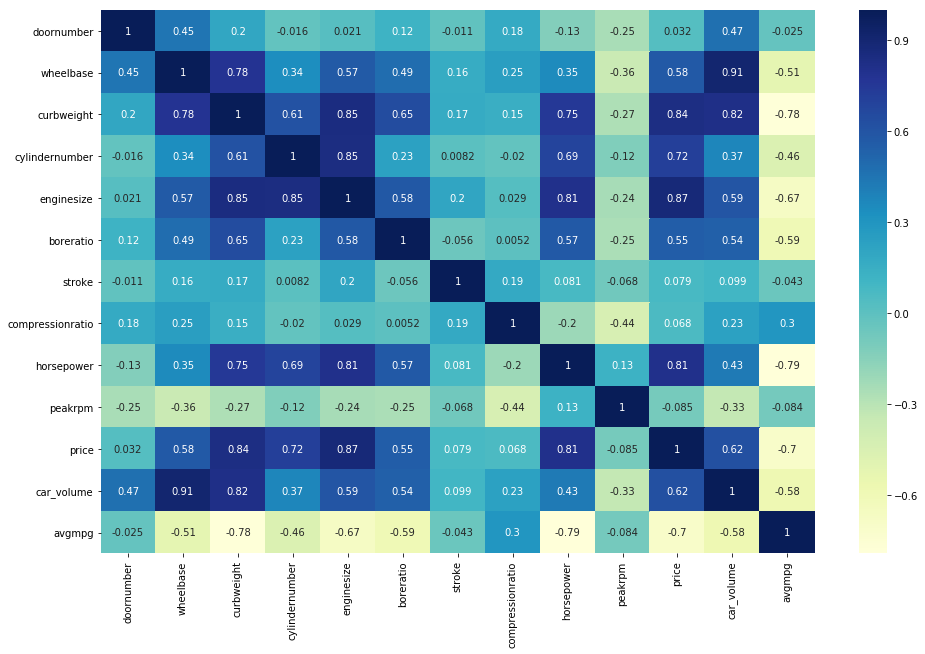

In [12]:
plt.figure(figsize = (16, 10))
sns.heatmap(car_data.corr(), annot = True, cmap="YlGnBu")
plt.show()

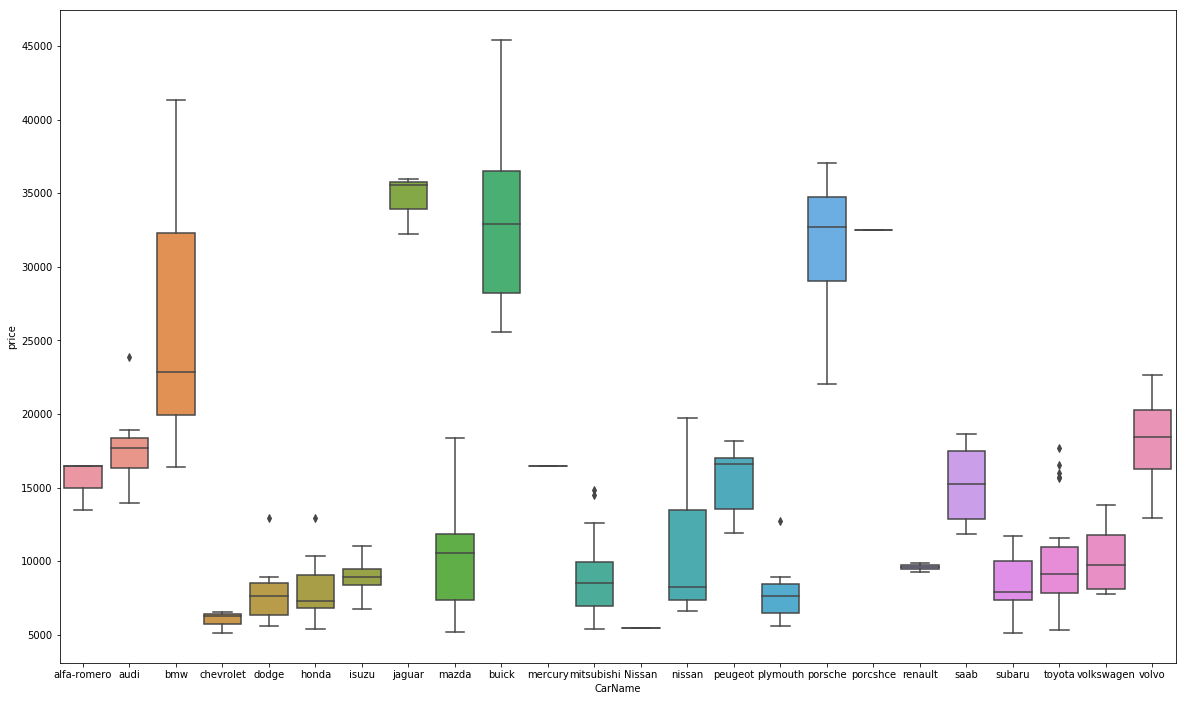

In [13]:
plt.figure(figsize=(20, 12))
sns.boxplot(x = 'CarName' , y = 'price' , data = car_data)
plt.show()

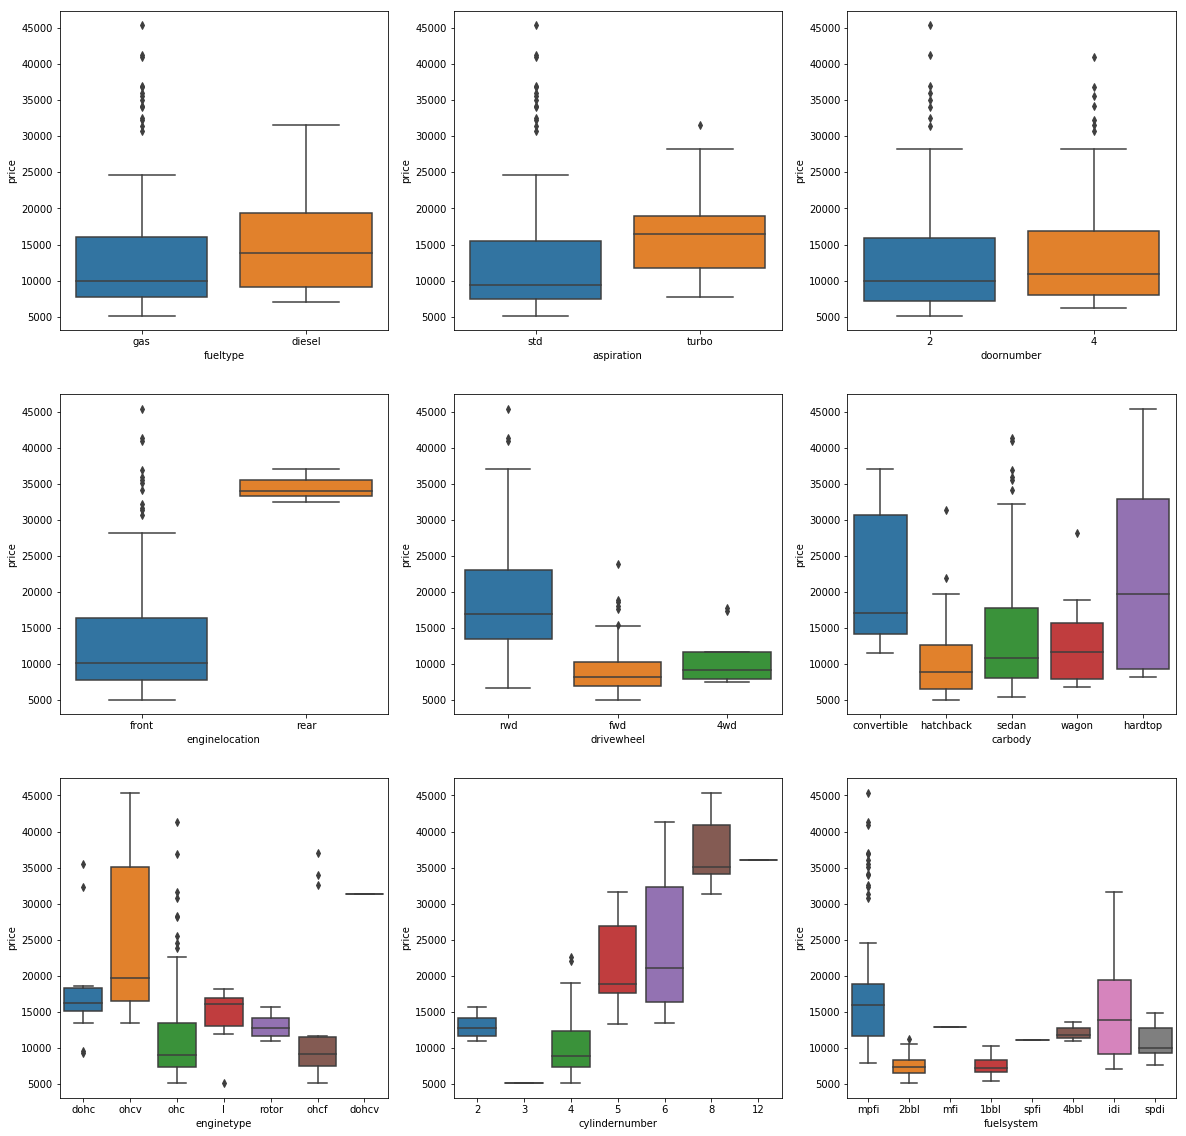

In [14]:
plt.figure(figsize=(20, 20))
plt.subplot(3,3,1)
sns.boxplot(x = 'fueltype', y = 'price', data = car_data)
plt.subplot(3,3,2)
sns.boxplot(x = 'aspiration', y = 'price', data = car_data)
plt.subplot(3,3,3)
sns.boxplot(x = 'doornumber', y = 'price', data = car_data)
plt.subplot(3,3,4)
sns.boxplot(x = 'enginelocation', y = 'price', data = car_data)
plt.subplot(3,3,5)
sns.boxplot(x = 'drivewheel', y = 'price', data = car_data)
plt.subplot(3,3,6)
sns.boxplot(x = 'carbody', y = 'price', data = car_data)
plt.subplot(3,3,7)
sns.boxplot(x = 'enginetype', y = 'price', data = car_data)
plt.subplot(3,3,8)
sns.boxplot(x = 'cylindernumber', y = 'price', data = car_data)
plt.subplot(3,3,9)
sns.boxplot(x = 'fuelsystem', y = 'price', data = car_data)
plt.show()

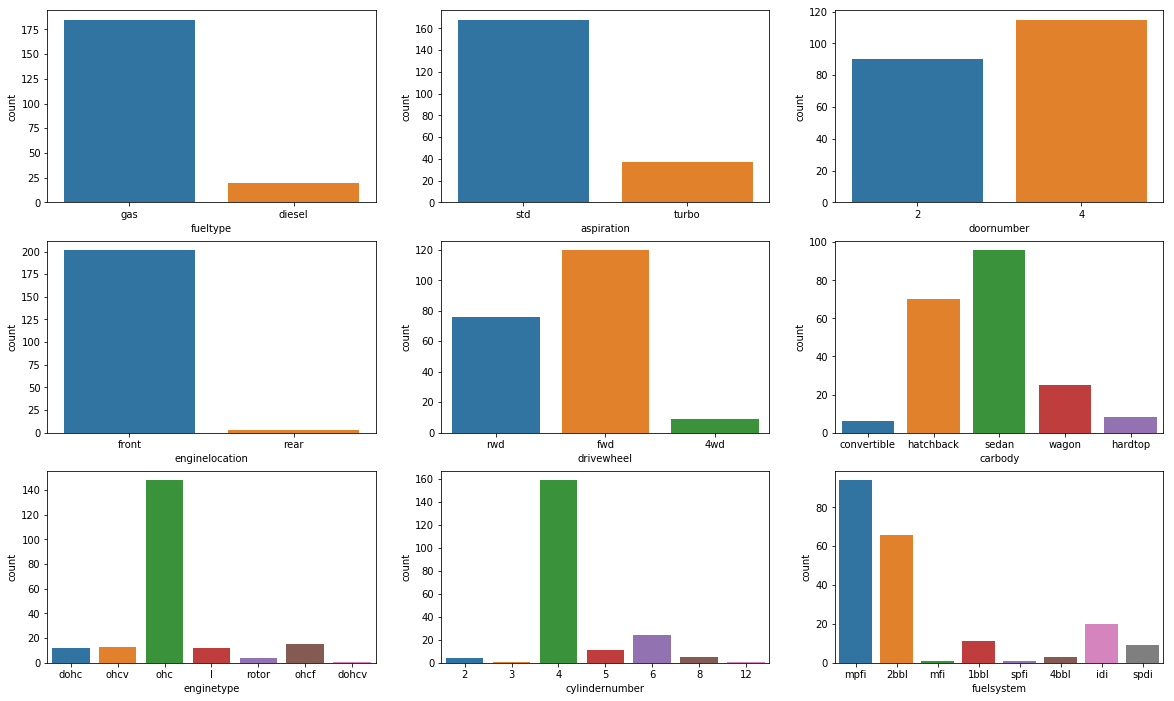

In [16]:
plt.figure(figsize=(20, 12))
plt.subplot(3,3,1)
sns.countplot(x = 'fueltype', data = car_data)
plt.subplot(3,3,2)
sns.countplot(x = 'aspiration', data = car_data)
plt.subplot(3,3,3)
sns.countplot(x = 'doornumber', data = car_data)
plt.subplot(3,3,4)
sns.countplot(x = 'enginelocation', data = car_data)
plt.subplot(3,3,5)
sns.countplot(x = 'drivewheel', data = car_data)
plt.subplot(3,3,6)
sns.countplot(x = 'carbody', data = car_data)
plt.subplot(3,3,7)
sns.countplot(x = 'enginetype', data = car_data)
plt.subplot(3,3,8)
sns.countplot(x = 'cylindernumber', data = car_data)
plt.subplot(3,3,9)
sns.countplot(x = 'fuelsystem', data = car_data)
plt.show()

### from the above plots it is evident that no feature that is mentioned above can be dropped so converting them and then try to look into it through statistical approach.

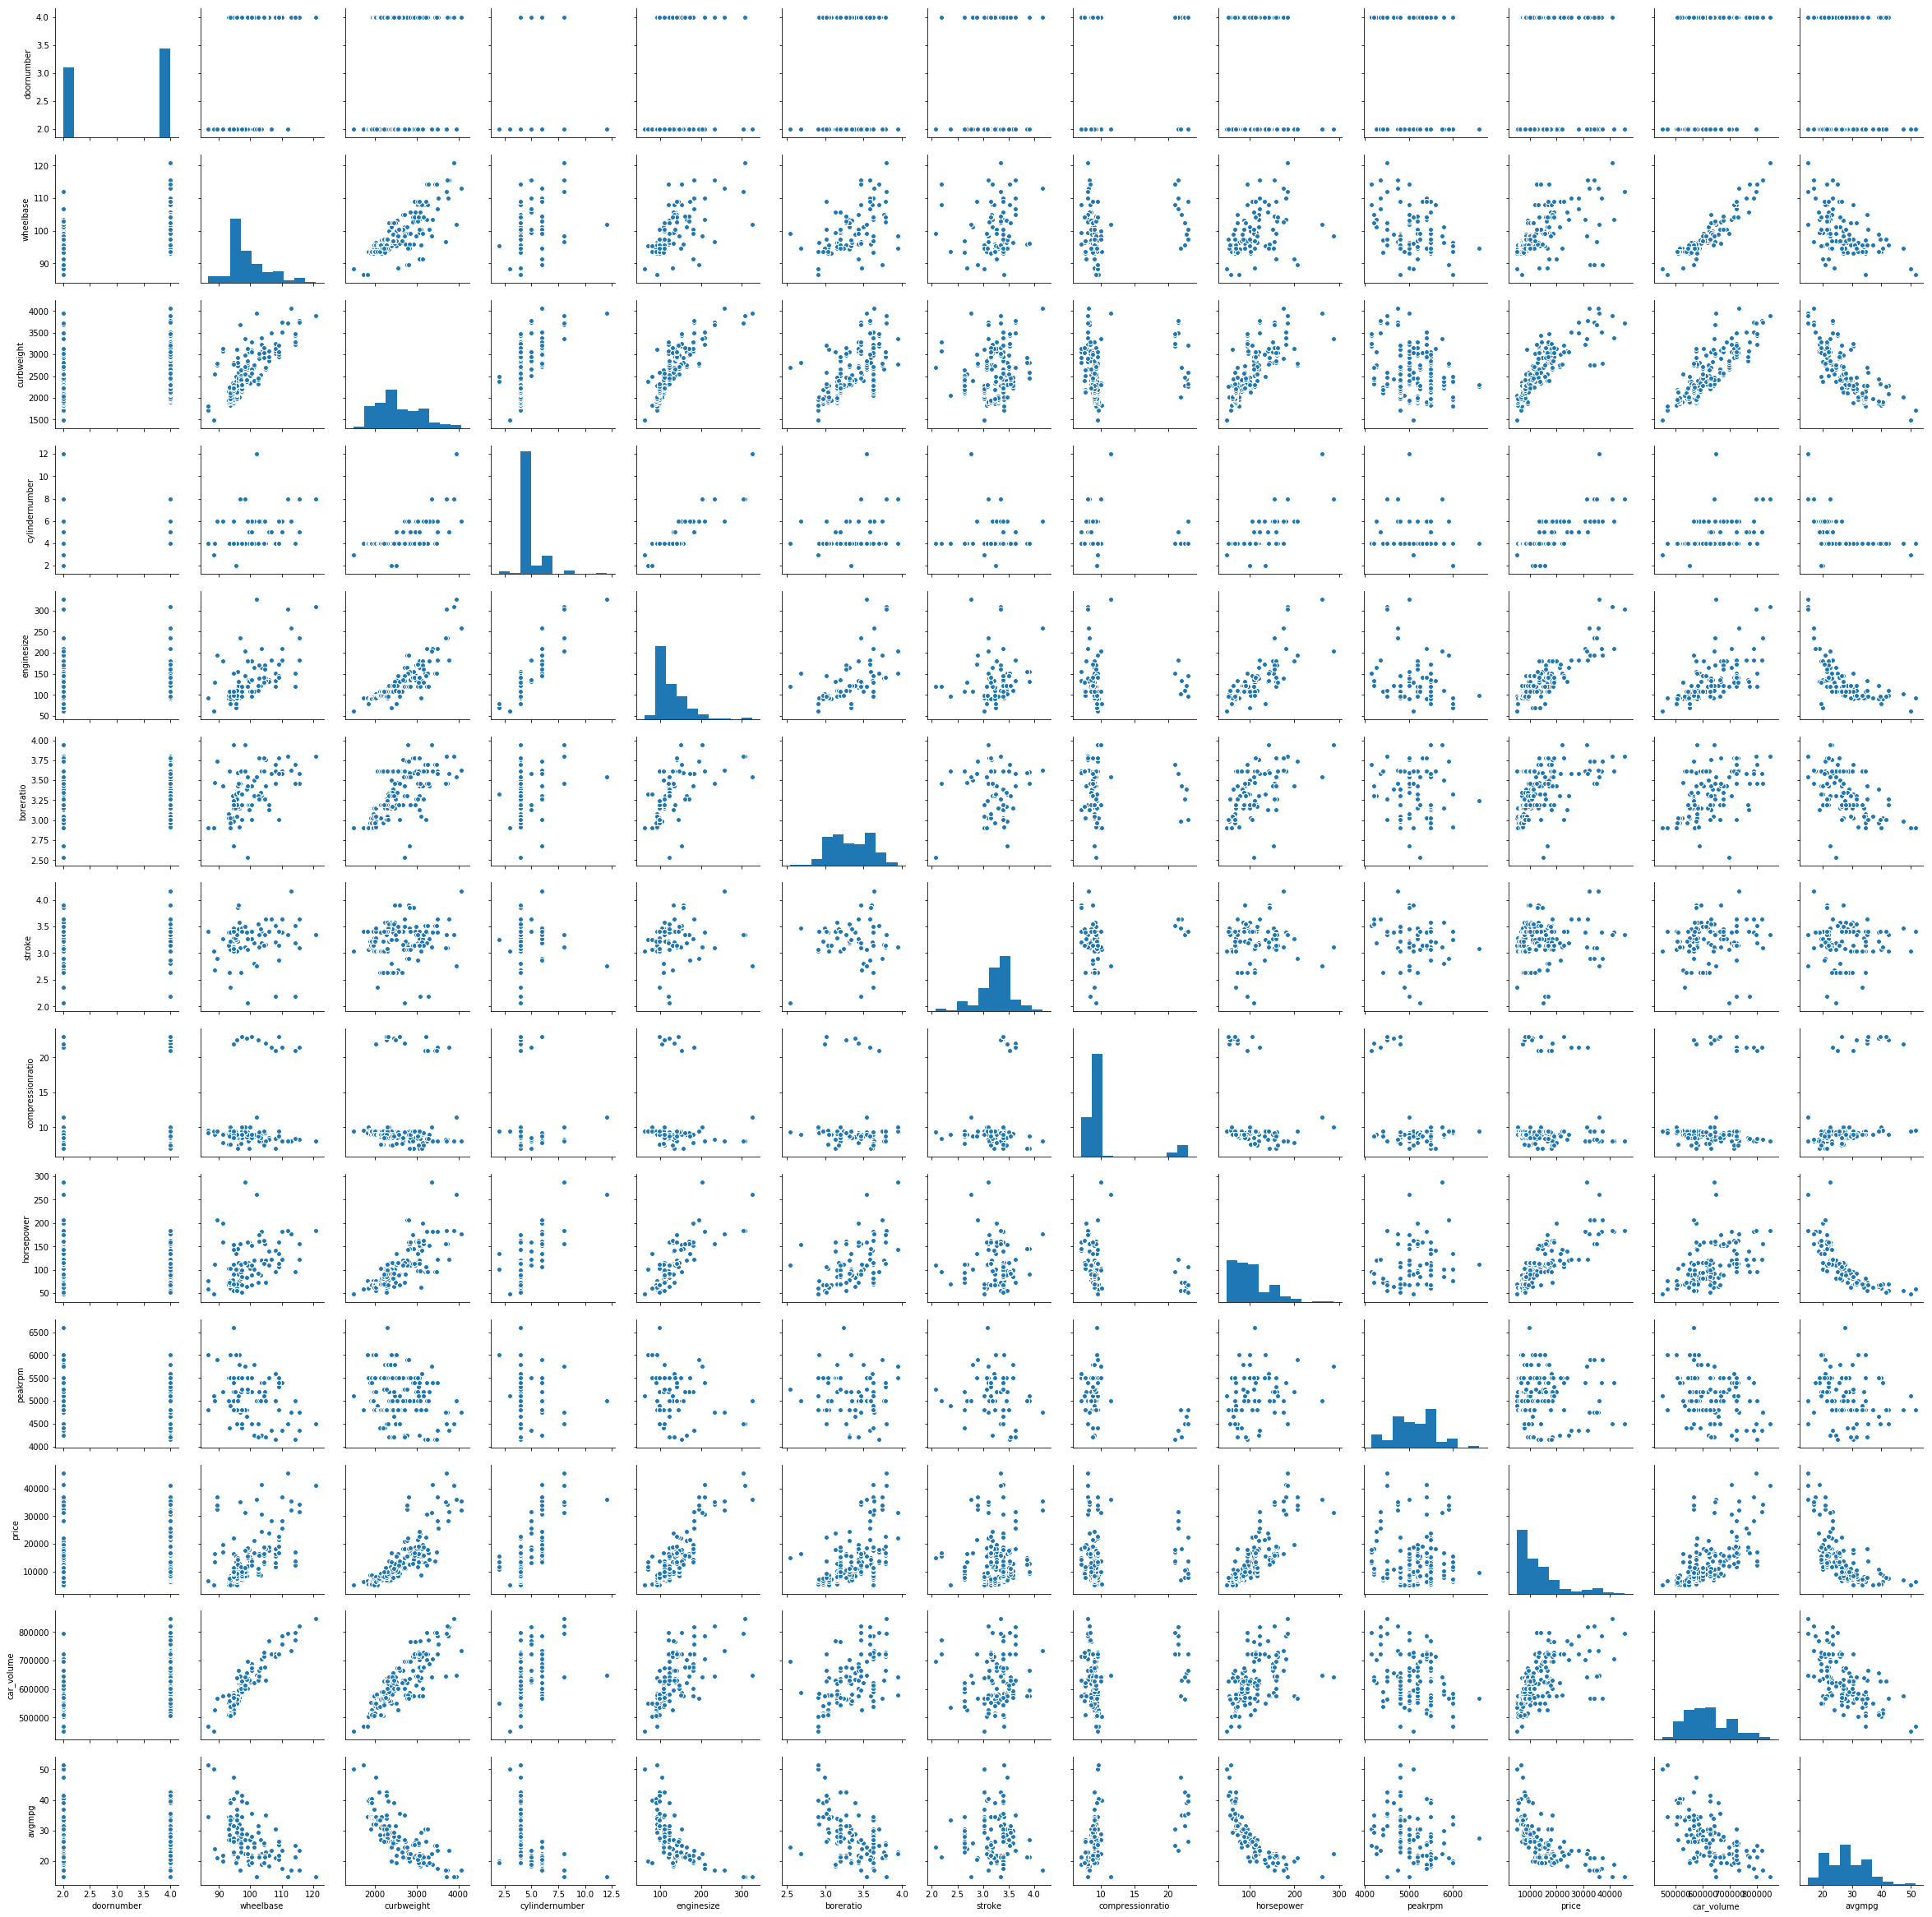

In [17]:
sns.pairplot(car_data)
plt.show()

In [18]:
car_data = pd.get_dummies(car_data,columns=['CarName','fueltype','aspiration','doornumber','carbody','drivewheel','enginelocation','enginetype','cylindernumber','fuelsystem'],drop_first=True)
car_data.head()

,wheelbase,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,price,car_volume,...,cylindernumber_6,cylindernumber_8,cylindernumber_12,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi
0,88.6,2548,130,3.47,2.68,9.0,111,5000,13495.0,528019.904,...,0,0,0,0,0,0,0,1,0,0
1,88.6,2548,130,3.47,2.68,9.0,111,5000,16500.0,528019.904,...,0,0,0,0,0,0,0,1,0,0
2,94.5,2823,152,2.68,3.47,9.0,154,5000,16500.0,587592.640,...,1,0,0,0,0,0,0,1,0,0
3,99.8,2337,109,3.19,3.40,10.0,102,5500,13950.0,634816.956,...,0,0,0,0,0,0,0,1,0,0
4,99.4,2824,136,3.19,3.40,8.0,115,5500,17450.0,636734.832,...,0,0,0,0,0,0,0,1,0,0


In [19]:
car_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 63 columns):
wheelbase              205 non-null float64
curbweight             205 non-null int64
enginesize             205 non-null int64
boreratio              205 non-null float64
stroke                 205 non-null float64
compressionratio       205 non-null float64
horsepower             205 non-null int64
peakrpm                205 non-null int64
price                  205 non-null float64
car_volume             205 non-null float64
avgmpg                 205 non-null float64
CarName_alfa-romero    205 non-null uint8
CarName_audi           205 non-null uint8
CarName_bmw            205 non-null uint8
CarName_buick          205 non-null uint8
CarName_chevrolet      205 non-null uint8
CarName_dodge          205 non-null uint8
CarName_honda          205 non-null uint8
CarName_isuzu          205 non-null uint8
CarName_jaguar         205 non-null uint8
CarName_mazda          205 non-null uint8

In [20]:
car_data.describe()

,wheelbase,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,price,car_volume,...,cylindernumber_6,cylindernumber_8,cylindernumber_12,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,...,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,98.756585,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,13276.710571,618719.288873,...,0.117073,0.024390,0.004878,0.321951,0.014634,0.097561,0.004878,0.458537,0.043902,0.004878
std,6.021776,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,7988.852332,79463.195262,...,0.322294,0.154635,0.069843,0.468368,0.120377,0.297446,0.069843,0.499498,0.205380,0.069843
min,86.600000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,5118.000000,452643.156000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,94.500000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,7788.000000,566490.600000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,97.000000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,10295.000000,601385.700000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,102.400000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,16503.000000,666250.200000,...,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
max,120.900000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,45400.000000,846007.659000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### Splitting data

In [21]:
from sklearn.model_selection import train_test_split

np.random.seed(0)
df_train, df_test = train_test_split(car_data, train_size = 0.8, test_size = 0.2, random_state = 100)

In [22]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 164 entries, 3 to 8
Data columns (total 63 columns):
wheelbase              164 non-null float64
curbweight             164 non-null int64
enginesize             164 non-null int64
boreratio              164 non-null float64
stroke                 164 non-null float64
compressionratio       164 non-null float64
horsepower             164 non-null int64
peakrpm                164 non-null int64
price                  164 non-null float64
car_volume             164 non-null float64
avgmpg                 164 non-null float64
CarName_alfa-romero    164 non-null uint8
CarName_audi           164 non-null uint8
CarName_bmw            164 non-null uint8
CarName_buick          164 non-null uint8
CarName_chevrolet      164 non-null uint8
CarName_dodge          164 non-null uint8
CarName_honda          164 non-null uint8
CarName_isuzu          164 non-null uint8
CarName_jaguar         164 non-null uint8
CarName_mazda          164 non-null uint8
C

In [23]:
df_train.describe()

,wheelbase,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,price,car_volume,...,cylindernumber_6,cylindernumber_8,cylindernumber_12,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi
count,164.000000,164.000000,164.000000,164.000000,164.000000,164.000000,164.000000,164.000000,164.000000,164.000000,...,164.000000,164.000000,164.000000,164.000000,164.000000,164.000000,164.000000,164.000000,164.000000,164.0
mean,98.333537,2515.536585,123.670732,3.297378,3.263476,10.245854,101.048780,5131.097561,12761.095530,612189.921634,...,0.121951,0.018293,0.006098,0.353659,0.018293,0.103659,0.006098,0.414634,0.042683,0.0
std,5.734186,521.607031,39.470438,0.256931,0.304020,4.092722,39.362684,471.138827,7691.539897,77429.760475,...,0.328232,0.134418,0.078087,0.479569,0.134418,0.305751,0.078087,0.494168,0.202760,0.0
min,86.600000,1488.000000,61.000000,2.680000,2.190000,7.000000,48.000000,4150.000000,5118.000000,452643.156000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
25%,94.500000,2126.500000,97.000000,3.050000,3.110000,8.575000,69.750000,4800.000000,7669.000000,562077.438000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
50%,96.500000,2385.000000,110.000000,3.270000,3.290000,9.000000,92.000000,5200.000000,9927.000000,593851.345000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
75%,100.400000,2835.750000,137.250000,3.540000,3.410000,9.400000,116.000000,5500.000000,15808.750000,656215.350000,...,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.0
max,115.600000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,41315.000000,820742.730000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.0


In [24]:
num_vars = ['wheelbase','curbweight','enginesize','boreratio','stroke','compressionratio','horsepower','peakrpm','car_volume','avgmpg']

df_train[num_vars] = scaler.fit_transform(df_train[num_vars])
df_train.head()

,wheelbase,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,price,car_volume,...,cylindernumber_6,cylindernumber_8,cylindernumber_12,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi
3,0.455172,0.329325,0.181132,0.404762,0.611111,0.18750,0.225000,0.551020,13950.0,0.494904,...,0,0,0,0,0,0,0,1,0,0
157,0.313793,0.240884,0.139623,0.404762,0.424242,0.12500,0.091667,0.265306,7198.0,0.306520,...,0,0,0,1,0,0,0,0,0,0
81,0.334483,0.325834,0.230189,0.531746,0.641414,0.09375,0.166667,0.346939,8499.0,0.288722,...,0,0,0,1,0,0,0,0,0,0
32,0.244828,0.135376,0.067925,0.182540,0.444444,0.19375,0.050000,0.551020,5399.0,0.142127,...,0,0,0,0,0,0,0,0,0,0
99,0.365517,0.324282,0.222642,0.515873,0.646465,0.09375,0.204167,0.428571,8949.0,0.450361,...,0,0,0,1,0,0,0,0,0,0


In [25]:
y_train = df_train.pop('price')
X_train = df_train

In [26]:
X_train.head()

,wheelbase,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,car_volume,avgmpg,...,cylindernumber_6,cylindernumber_8,cylindernumber_12,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi
3,0.455172,0.329325,0.181132,0.404762,0.611111,0.18750,0.225000,0.551020,0.494904,0.328767,...,0,0,0,0,0,0,0,1,0,0
157,0.313793,0.240884,0.139623,0.404762,0.424242,0.12500,0.091667,0.265306,0.306520,0.506849,...,0,0,0,1,0,0,0,0,0,0
81,0.334483,0.325834,0.230189,0.531746,0.641414,0.09375,0.166667,0.346939,0.288722,0.369863,...,0,0,0,1,0,0,0,0,0,0
32,0.244828,0.135376,0.067925,0.182540,0.444444,0.19375,0.050000,0.551020,0.142127,0.684932,...,0,0,0,0,0,0,0,0,0,0
99,0.365517,0.324282,0.222642,0.515873,0.646465,0.09375,0.204167,0.428571,0.450361,0.424658,...,0,0,0,1,0,0,0,0,0,0


In [27]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
lnr = LinearRegression()
lnr.fit(X_train,y_train)

rfe = RFE(lnr, 14)             # running RFE
rfe = rfe.fit(X_train, y_train)

In [28]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('wheelbase', False, 3),
 ('curbweight', True, 1),
 ('enginesize', True, 1),
 ('boreratio', True, 1),
 ('stroke', True, 1),
 ('compressionratio', False, 29),
 ('horsepower', True, 1),
 ('peakrpm', False, 15),
 ('car_volume', False, 19),
 ('avgmpg', False, 2),
 ('CarName_alfa-romero', False, 24),
 ('CarName_audi', False, 11),
 ('CarName_bmw', True, 1),
 ('CarName_buick', False, 10),
 ('CarName_chevrolet', False, 22),
 ('CarName_dodge', False, 20),
 ('CarName_honda', False, 47),
 ('CarName_isuzu', False, 35),
 ('CarName_jaguar', False, 33),
 ('CarName_mazda', False, 27),
 ('CarName_mercury', False, 42),
 ('CarName_mitsubishi', False, 17),
 ('CarName_nissan', False, 45),
 ('CarName_peugeot', False, 13),
 ('CarName_plymouth', False, 18),
 ('CarName_porcshce', False, 43),
 ('CarName_porsche', True, 1),
 ('CarName_renault', False, 23),
 ('CarName_saab', False, 4),
 ('CarName_subaru', False, 40),
 ('CarName_toyota', False, 48),
 ('CarName_volkswagen', False, 44),
 ('CarName_volvo', True, 1),

In [29]:
col = X_train.columns[rfe.support_]
col

Index(['curbweight', 'enginesize', 'boreratio', 'stroke', 'horsepower',
       'CarName_bmw', 'CarName_porsche', 'CarName_volvo',
       'enginelocation_rear', 'enginetype_rotor', 'cylindernumber_3',
       'cylindernumber_6', 'cylindernumber_8', 'cylindernumber_12'],
      dtype='object')

In [30]:
X_train_rfe = X_train[col]

## statsmodel approach for feature selection

In [31]:
import statsmodels.api as sm  
X_train_rfe = sm.add_constant(X_train_rfe)

In [32]:

lm1 = sm.OLS(y_train,X_train_rfe).fit()

In [33]:
print(lm1.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.934
Model:                            OLS   Adj. R-squared:                  0.928
Method:                 Least Squares   F-statistic:                     151.5
Date:                Mon, 29 Apr 2019   Prob (F-statistic):           1.56e-80
Time:                        12:42:50   Log-Likelihood:                -1476.3
No. Observations:                 164   AIC:                             2983.
Df Residuals:                     149   BIC:                             3029.
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                6189.8435    

In [34]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,37.95
2,enginesize,30.19
1,curbweight,7.36
12,cylindernumber_6,6.44
5,horsepower,5.12
3,boreratio,5.09
14,cylindernumber_12,5.01
13,cylindernumber_8,3.48
7,CarName_porsche,3.16
4,stroke,2.75


### horsepower seems insignificant 

In [35]:
X_train_rfe2 = X_train_rfe.drop(["horsepower"], axis = 1)


In [36]:
X_train_lm2 = sm.add_constant(X_train_rfe2)

lm2 = sm.OLS(y_train,X_train_lm2).fit()

In [37]:
print(lm2.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.932
Model:                            OLS   Adj. R-squared:                  0.926
Method:                 Least Squares   F-statistic:                     158.5
Date:                Mon, 29 Apr 2019   Prob (F-statistic):           1.43e-80
Time:                        12:42:53   Log-Likelihood:                -1479.0
No. Observations:                 164   AIC:                             2986.
Df Residuals:                     150   BIC:                             3029.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                6104.7957   1

In [38]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif['Features'] = X_train_rfe2.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe2.values, i) for i in range(X_train_rfe2.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,37.89
2,enginesize,29.95
1,curbweight,7.01
11,cylindernumber_6,6.04
3,boreratio,5.03
13,cylindernumber_12,4.83
12,cylindernumber_8,3.41
4,stroke,2.74
6,CarName_porsche,2.74
8,enginelocation_rear,2.62


In [39]:
X_train_rfe3 = X_train_rfe2.drop(["cylindernumber_3"], axis = 1)
X_train_lm3 = sm.add_constant(X_train_rfe3)

lm3 = sm.OLS(y_train,X_train_lm3).fit()

In [40]:
print(lm3.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.929
Model:                            OLS   Adj. R-squared:                  0.923
Method:                 Least Squares   F-statistic:                     165.0
Date:                Mon, 29 Apr 2019   Prob (F-statistic):           2.82e-80
Time:                        12:42:55   Log-Likelihood:                -1482.6
No. Observations:                 164   AIC:                             2991.
Df Residuals:                     151   BIC:                             3032.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                6228.3076   1

In [41]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif['Features'] = X_train_rfe3.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe3.values, i) for i in range(X_train_rfe3.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,37.81
2,enginesize,29.78
1,curbweight,7.01
10,cylindernumber_6,5.99
3,boreratio,5.02
12,cylindernumber_12,4.80
11,cylindernumber_8,3.38
6,CarName_porsche,2.74
4,stroke,2.73
8,enginelocation_rear,2.62


In [42]:
X_train_rfe4 = X_train_rfe3.drop(["cylindernumber_8"], axis = 1)
X_train_lm4 = sm.add_constant(X_train_rfe4)

lm4 = sm.OLS(y_train,X_train_lm4).fit()

In [43]:
print(lm4.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.926
Model:                            OLS   Adj. R-squared:                  0.921
Method:                 Least Squares   F-statistic:                     173.7
Date:                Mon, 29 Apr 2019   Prob (F-statistic):           3.86e-80
Time:                        12:42:57   Log-Likelihood:                -1485.8
No. Observations:                 164   AIC:                             2996.
Df Residuals:                     152   BIC:                             3033.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                4941.2169    

In [44]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif['Features'] = X_train_rfe4.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe4.values, i) for i in range(X_train_rfe4.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,27.77
2,enginesize,12.95
1,curbweight,6.30
10,cylindernumber_6,3.04
3,boreratio,2.95
11,cylindernumber_12,2.37
6,CarName_porsche,2.27
8,enginelocation_rear,2.23
4,stroke,1.62
9,enginetype_rotor,1.39


In [45]:
pred_X_train = lm4.predict(X_train_lm4)

## Model evaluation

Text(0,0.5,'y_pred')

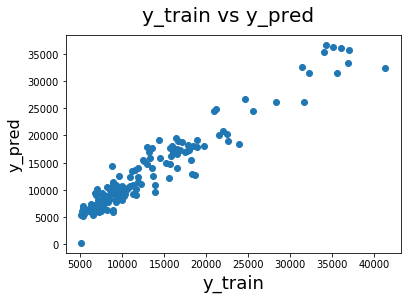

In [46]:
fig = plt.figure()
plt.scatter(y_train, pred_X_train)
fig.suptitle('y_train vs y_pred', fontsize = 20)              # Plot heading 
plt.xlabel('y_train', fontsize = 18)                          # X-label
plt.ylabel('y_pred', fontsize = 16)

### Residual analysis

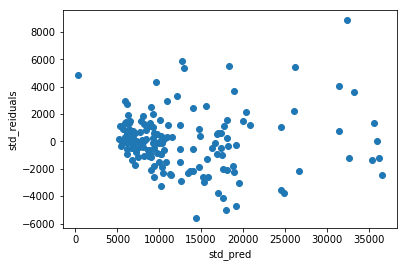

In [47]:
residuals = y_train - pred_X_train
plt.scatter(pred_X_train,residuals)
plt.xlabel('std_pred')
plt.ylabel('std_reiduals')
plt.show()

### Errors are normally distributed

C:\Users\SOLDIER\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


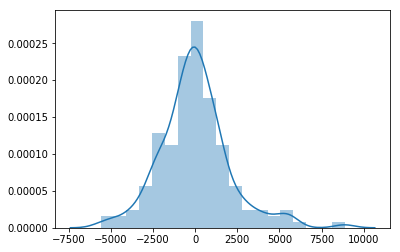

In [48]:
sns.distplot(residuals)

### Predictions

In [49]:
num_vars = ['wheelbase','curbweight','enginesize','boreratio','stroke','compressionratio','horsepower','peakrpm','car_volume','avgmpg']

df_test[num_vars] = scaler.transform(df_test[num_vars])
y_test = df_test.pop('price')
X_test = df_test

In [50]:
X_train_lm4.columns

Index(['const', 'curbweight', 'enginesize', 'boreratio', 'stroke',
       'CarName_bmw', 'CarName_porsche', 'CarName_volvo',
       'enginelocation_rear', 'enginetype_rotor', 'cylindernumber_6',
       'cylindernumber_12'],
      dtype='object')

In [51]:
X_train_lm4 = X_train_lm4.drop(['const'], axis=1)
X_test_new = X_test[X_train_lm4.columns]

# Adding a constant variable 
X_test_new = sm.add_constant(X_test_new)

In [52]:
X_test_new.columns

Index(['const', 'curbweight', 'enginesize', 'boreratio', 'stroke',
       'CarName_bmw', 'CarName_porsche', 'CarName_volvo',
       'enginelocation_rear', 'enginetype_rotor', 'cylindernumber_6',
       'cylindernumber_12'],
      dtype='object')

In [53]:
y_pred = lm4.predict(X_test_new)

In [54]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.8885969952851069

Text(0,0.5,'y_pred')

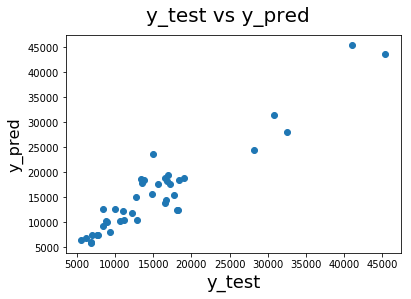

In [56]:
fig = plt.figure()
plt.scatter(y_test, y_pred)
fig.suptitle('y_test vs y_pred', fontsize = 20)              # Plot heading 
plt.xlabel('y_test', fontsize = 18)                          # X-label
plt.ylabel('y_pred', fontsize = 16)

In [59]:
y_test.shape

(41,)

Text(0,0.5,'Car_Price')

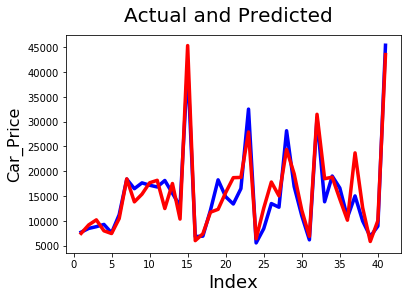

In [60]:
c = [i for i in range(1,42)]
fig = plt.figure()
plt.plot(c,y_test, color="blue", linewidth=3.5, linestyle="-")     #Plotting Actual
plt.plot(c,y_pred, color="red",  linewidth=3.5, linestyle="-")  #Plotting predicted
fig.suptitle('Actual and Predicted', fontsize=20)              # Plot heading 
plt.xlabel('Index', fontsize=18)                               # X-label
plt.ylabel('Car_Price', fontsize=16)

# lm4 is the model with R-square 92 on train and 88 on test